# 병합 군집 예제코드

병합 군집의 간단한 설명은 [Link](https://www.notion.so/AgglomerativeClustering-72caac3e5e104efd80dbe041d98fca42)를 참고

* 사용한 데이터는 sklearn에서 제공하는 make_blobs로 샘플 데이터를 생성합니다.
* skleran.cluster.AgglomerativeClustering 함수로 클러스터링하는 과정입니다.
* 파라미터를 변경하면서 결과를 확인합니다.
* 미리 유사도나 거리를 계산하여 클러스터링하는 방법인 `precomputed` 파라미터로 클러스터링 과정을 진행합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import make_blobs

In [2]:
n_samples = 500
n_components = 6

features, labels = make_blobs(n_samples=n_samples, centers=n_components, random_state=102)

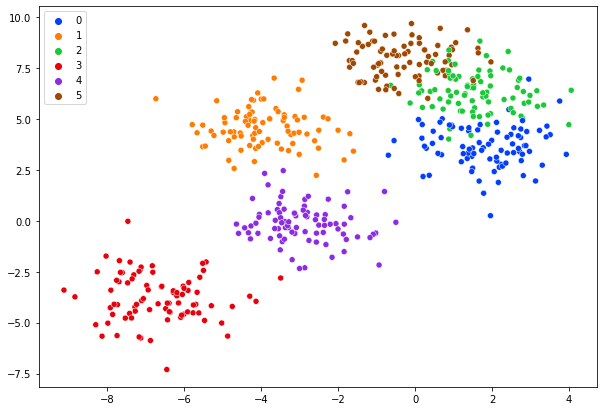

In [3]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette='bright')
plt.show()

`AgglomerativeClustering`의 주요 파라미터는 다음과 같습니다.

* n_clustersint : 생성할 군집의 수를 설정합니다. 기본값은 2입니다.
* affinity : 데이터 사이 거리 혹은 유사도를 계산하는 알고리즘을 명시합니다. 기본값은 유클리드 거리(euclidean)입니다.
* linkage : 군집을 줄여가는 방법을 명시합니다.
    1. `ward` : 각 집단의 분산이 최소가 되도록 병합
    2. `average` : 군집에 포함된 데이터의 거리의 평균이 최소가 되는 군집과 병합
    3. `complete` or `maximum` : 군집에 포함된 데이터 중, 가장 멀리있는 데이터와의 거리가 최소인 군집과 병합
    4. `single` : 군집에 포함된 데이터중, 가장 가까운 데이터와 거리가 최소인 군집과 병합.

## 클러스터 학습

In [4]:
cluster = AgglomerativeClustering(n_clusters=6)
cluster = cluster.fit(features, y =labels)

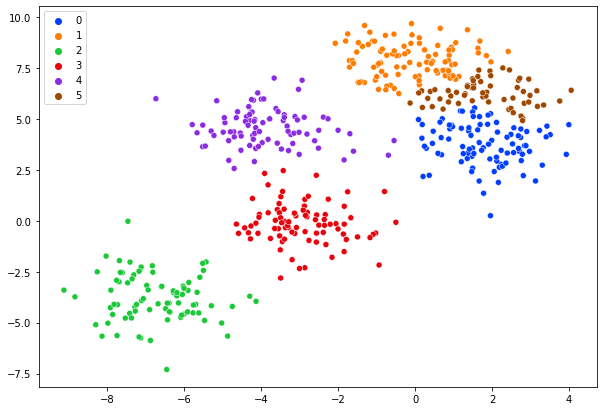

In [5]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster.labels_, palette='bright')
plt.show()

방법을 바꾸니 5번 클러스터는 1개의 점만 있으며, 오른쪽 위쪽에 있던 데이터가 2개의 집단으로만 분류된 것을 볼 수 있습니다.

In [6]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='l1', linkage='average')
cluster = cluster.fit(features, y =labels)

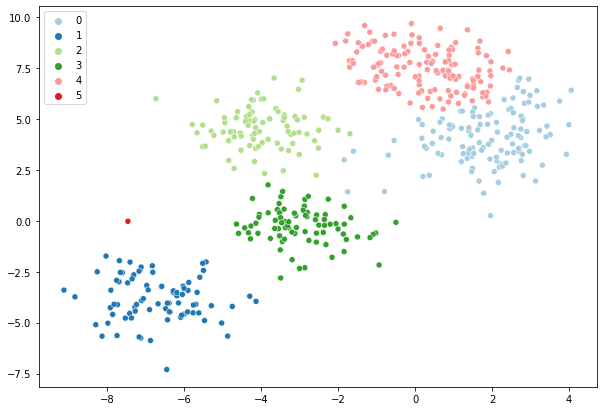

In [7]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster.labels_, palette='Paired')
plt.show()

In [8]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='average')
cluster = cluster.fit(features, y =labels)

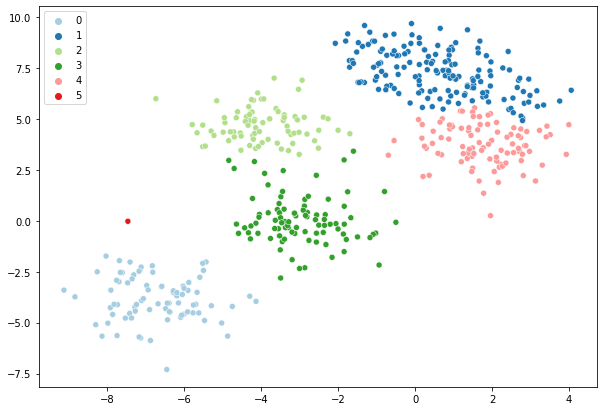

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster.labels_, palette='Paired')
plt.show()

그렇다면, 거리 계산을 미리한 precomputed는 어떻게 사용할까요?

* 각 점과 다른 점 사이의 특정 거리가 계산된 배열이 있어야 가능합니다. 이 예제에서는 샘플 데이터의 수가 500개 이므로 (500, 500)로 계산된 데이터로 clustering 모델을 학습할 수 있습니다.
* `precomputed` 를 사용할 경우, `linkage='ward'`를 사용할 수 없습니다.

In [10]:
cluster_precomputed = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='average')

In [11]:
from scipy.spatial import distance

In [12]:
dis_array = np.array([distance.cdist([i], features) for i in features])
dis_array = np.squeeze(dis_array, axis=1) # 500, 1, 500 -> 500, 500

In [13]:
print(dis_array.shape)
print(dis_array[:3])

(500, 500)
[[ 0.          6.86312071  6.90592867 ...  5.40182355  2.8879228
   5.69345576]
 [ 6.86312071  0.         13.54728692 ...  1.79663093  8.11734822
   3.38880041]
 [ 6.90592867 13.54728692  0.         ... 12.25447838  7.72813332
  12.5619054 ]]


In [14]:
cluster_precomputed = cluster_precomputed.fit(dis_array)

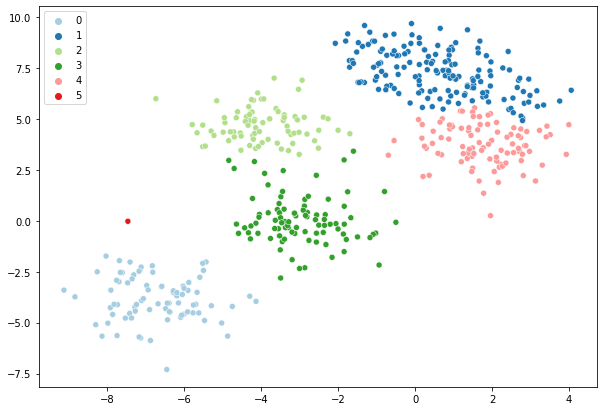

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=cluster_precomputed.labels_, palette='Paired')
plt.show()

`cluster = AgglomerativeClustering(n_clusters=6, linkage='average')` 모델과 동일한 결과값을 확인할 수 있습니다.

In [16]:
assert sum(cluster.labels_ == cluster_precomputed.labels_) == len(features)
print('Number of Same labels : {}'.format(sum(cluster.labels_ == cluster_precomputed.labels_)))

Number of Same labels : 500
